# Implementation of Linear Regression from scratch

## References 

1. https://www.coursera.org/learn/machine-learning/home/week/1

## Import libraries

In [40]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D

## Define the problem. 

What is the cost of an unknown house? Regression task.

| Size (1000 sqft)     | Price (1000s of dollars) |
| -------------------| ------------------------ |
| 1.0               | 300                      |
| 2.0               | 500                      |

In [17]:
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])

print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

m = len(x_train) # number of examples
print(f"Number of training examples is {m}")

x_train = [1. 2.]
y_train = [300. 500.]
Number of training examples is 2


## Plotting the data

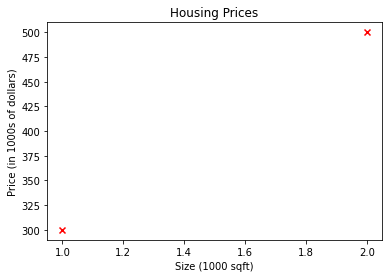

In [19]:
plt.scatter(x_train, y_train, marker='x', c = 'r')
plt.title("Housing Prices")
plt.ylabel('Price (in 1000s of dollars)')
plt.xlabel('Size (1000 sqft)')
plt.show()

## Linear Regression Formula

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

## Function to compute the model output

Now, let's compute the value of $f_{w,b}(x^{(i)})$ for your two data points. You can explicitly write this out for each data point as - 

for $x^{(0)}$, `f_wb = w * x[0] + b`

for $x^{(1)}$, `f_wb = w * x[1] + b`

For a large number of data points, this can get unwieldy and repetitive. So instead, you can calculate the function output in a `for` loop as shown in the `compute_model_output` function below.
> **Note**: The argument description `(ndarray (m,))` describes a Numpy n-dimensional array of shape (m,). `(scalar)` describes an argument without dimensions, just a magnitude.  
> **Note**: `np.zero(n)` will return a one-dimensional numpy array with $n$ entries   


In [23]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model.
    Args:
        x (ndarray (m, )): Data, m examples
        w, b (scalar)    : model parameters
    Returns:
        y (ndarray (m, )): target values
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    
    for i in range(m):
        f_wb[i] = w*x[i] + b
    
    return f_wb

## Plot for different values of w and b

w: 200
b: 100


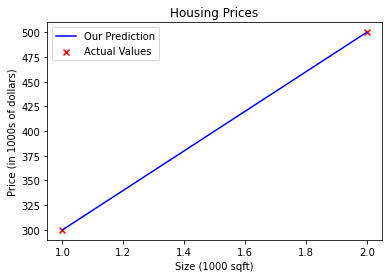

In [27]:
w = 200
b = 100
print(f"w: {w}")
print(f"b: {b}")

tmp_f_wb = compute_model_output(x_train, w, b,)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

## Cost function

In [30]:
def compute_cost(x, y, w, b):
    """
    Computes the cost of a linear model.
    Args:
        x (ndarray (m, ))   : Data, m examples
        y (ndarray (m, ))   : target values.
        w, b (scalar)       : model parameters
    Returns:
        total_cost (scalar) : total computed cost
    """
    
    m = len(x)
    cost = 0
    
    for i in range(m):
        f_wb = w*x[i] + b
        cost += (f_wb - y[i])**2

    total_cost = (1/2*m)*cost
    return cost

## Gradient Descent Equations

Gradient descent is used to the find the most optimal parameters w, b for a linear model $f_{w,b}(x^{(i)}) = wx^{(i)} + b$

The cost function computing the error between the actual data $y^{(i)}$ and $f_{w,b}(x^{(i)})$ is $J(w, b)$.

$$J(w, b) = \frac{1}{2m}\sum_{i = 0}^{m - 1}(f_{w,b}(x^{(i)}) - y^{(i)})^2$$

Gradient descent algorithm is:

$$\begin{align*} \text{repeat} &\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w}  \; \newline
    b &= b - \alpha \frac{\partial J(w,b)}{\delta b} \; \newline
\newline \rbrace
\end{align*}$$

where parameters $w$, $b$ are updated simultaneously, i.e. partial derivatives are computed for all the parameters before updating any of the parameters.

For linear regression, the gradients are:

$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m}\sum_{i = 0}^{m - 1}(f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \\
\end{align}
$$


## Gradient descent implementation

In [34]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
        x(ndarray(m, )): Data, m examples
        y(ndarray(m, )): target values
        w,b (scalar)    : model parameters  
    Returns:
        dj_dw(scalar): The gradient of the cost w.r.t the parameter w
        dj_db(scalar): The gradient of the cost w.r.t the parameter b
    """
    
    m = len(x)
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = w*x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_dw += dj_dw_i
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
    
    dj_db /= m
    dj_dw /= m
    
    return dj_dw, dj_db

In [37]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    """
        Performs gradient descent to find the optimal values of w, b that minimize the given cost function 
        by taking num_iters steps with learning rate alpha
        
        Args:
          x (ndarray (m,))  : Data, m examples 
          y (ndarray (m,))  : target values
          w_in,b_in (scalar): initial values of model parameters  
          alpha (float):     Learning rate
          num_iters (int):   number of iterations to run gradient descent
          cost_function:     function to call to produce cost
          gradient_function: function to call to produce gradient
        
        Returns:
            w (scalar): Updated value of w after running gradient descent
            b (scalar): Updated value of b after running gradient descent
            J_history (List): History of cost values.
            p_history (List): History of parameters [w, b]
    """
    
    w = copy.deepcopy(w_in)
    
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        
        b -= alpha*dj_db
        w -= alpha*dj_dw
        
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
            
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
            
        
    return w, b, J_history, p_history

## Training of model

In [41]:
w_in = 0
b_in = 0
iterations = 10000
tmp_alpha = 1.0e-2

w_final, b_final, J_hist, p_hist = gradient_descent(x_train, y_train, w_in, b_in, tmp_alpha, iterations,
                                                    compute_cost, compute_gradient)

print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")


Iteration    0: Cost 3.17e+05  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 1000: Cost 1.37e+01  dj_dw: -3.712e-01, dj_db:  6.007e-01   w:  1.949e+02, b: 1.08228e+02
Iteration 2000: Cost 3.17e+00  dj_dw: -1.789e-01, dj_db:  2.895e-01   w:  1.975e+02, b: 1.03966e+02
Iteration 3000: Cost 7.37e-01  dj_dw: -8.625e-02, dj_db:  1.396e-01   w:  1.988e+02, b: 1.01912e+02
Iteration 4000: Cost 1.71e-01  dj_dw: -4.158e-02, dj_db:  6.727e-02   w:  1.994e+02, b: 1.00922e+02
Iteration 5000: Cost 3.98e-02  dj_dw: -2.004e-02, dj_db:  3.243e-02   w:  1.997e+02, b: 1.00444e+02
Iteration 6000: Cost 9.24e-03  dj_dw: -9.660e-03, dj_db:  1.563e-02   w:  1.999e+02, b: 1.00214e+02
Iteration 7000: Cost 2.15e-03  dj_dw: -4.657e-03, dj_db:  7.535e-03   w:  1.999e+02, b: 1.00103e+02
Iteration 8000: Cost 4.99e-04  dj_dw: -2.245e-03, dj_db:  3.632e-03   w:  2.000e+02, b: 1.00050e+02
Iteration 9000: Cost 1.16e-04  dj_dw: -1.082e-03, dj_db:  1.751e-03   w:  2.000e+02, b: 1.00024e+02


## Plotting Cost vs Iterations

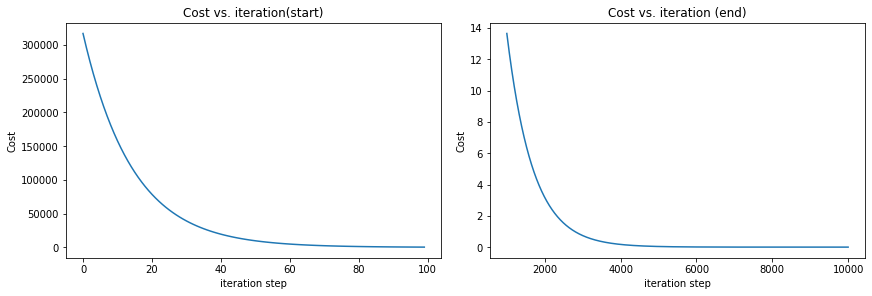

In [42]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

## Predictions on unknown quantities

In [43]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars
